In [55]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [56]:
dirTrain = "../../../Documents/ASL_Dataset/Train";
dirTeste = "../../../Documents/ASL_Dataset/Test";
dirTesteReal = "../../../Documents/ASL_Dataset/TesteReal";


In [57]:
Name=[]
for file in os.listdir(dirTrain):
    Name+=[file]

In [58]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [59]:
dataset=[]
count=0
for file in os.listdir(dirTrain):
    path=os.path.join(dirTrain,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(32,32))
        image=img_to_array(image)
        image=image/255.0
        dataset+=[[image,count]]
    count=count+1


In [60]:
print(dataset[5996])
    

[array([[[0.6745098 , 0.6784314 , 0.65882355],
        [0.6509804 , 0.67058825, 0.6431373 ],
        [0.6509804 , 0.6784314 , 0.6509804 ],
        ...,
        [0.627451  , 0.6156863 , 0.5568628 ],
        [0.61960787, 0.60784316, 0.5882353 ],
        [0.60784316, 0.6       , 0.54901963]],

       [[0.6627451 , 0.67058825, 0.65882355],
        [0.63529414, 0.6666667 , 0.6745098 ],
        [0.65882355, 0.6666667 , 0.6627451 ],
        ...,
        [0.61960787, 0.6117647 , 0.5529412 ],
        [0.58431375, 0.59607846, 0.5529412 ],
        [0.59607846, 0.6117647 , 0.5568628 ]],

       [[0.6666667 , 0.6627451 , 0.654902  ],
        [0.6313726 , 0.6627451 , 0.67058825],
        [0.64705884, 0.6666667 , 0.6509804 ],
        ...,
        [0.654902  , 0.59607846, 0.5686275 ],
        [0.62352943, 0.5921569 , 0.54901963],
        [0.5882353 , 0.5882353 , 0.54901963]],

       ...,

       [[0.54901963, 0.5882353 , 0.5529412 ],
        [0.54509807, 0.58431375, 0.5529412 ],
        [0.5803922 , 

In [61]:
testeset=[]
count=0
for file in os.listdir(dirTeste):
    path=os.path.join(dirTeste,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(32,32))
        image=img_to_array(image)
        image=image/255.0
        testeset+=[[image,count]]
    count=count+1


In [62]:
print(testeset[100])

[array([[[0.61960787, 0.654902  , 0.6745098 ],
        [0.6       , 0.6392157 , 0.6784314 ],
        [0.5921569 , 0.6509804 , 0.67058825],
        ...,
        [0.57254905, 0.59607846, 0.5803922 ],
        [0.59607846, 0.5803922 , 0.58431375],
        [0.5686275 , 0.58431375, 0.5803922 ]],

       [[0.59607846, 0.6509804 , 0.7019608 ],
        [0.5921569 , 0.6627451 , 0.6784314 ],
        [0.6117647 , 0.6392157 , 0.70980394],
        ...,
        [0.5803922 , 0.6039216 , 0.6039216 ],
        [0.56078434, 0.60784316, 0.6       ],
        [0.57254905, 0.59607846, 0.5568628 ]],

       [[0.5803922 , 0.6392157 , 0.6509804 ],
        [0.5764706 , 0.6431373 , 0.68235296],
        [0.62352943, 0.63529414, 0.654902  ],
        ...,
        [0.5882353 , 0.5882353 , 0.5882353 ],
        [0.5529412 , 0.5882353 , 0.58431375],
        [0.5647059 , 0.5647059 , 0.57254905]],

       ...,

       [[0.47058824, 0.5254902 , 0.5372549 ],
        [0.50980395, 0.5254902 , 0.5372549 ],
        [0.5254902 , 

In [63]:
print(dataset[6000])

[array([[[0.6039216 , 0.6862745 , 0.6509804 ],
        [0.67058825, 0.6627451 , 0.6745098 ],
        [0.64705884, 0.6666667 , 0.6784314 ],
        ...,
        [0.6117647 , 0.62352943, 0.54901963],
        [0.627451  , 0.6117647 , 0.5686275 ],
        [0.6117647 , 0.6156863 , 0.56078434]],

       [[0.6431373 , 0.6745098 , 0.6313726 ],
        [0.6627451 , 0.68235296, 0.654902  ],
        [0.6313726 , 0.6627451 , 0.67058825],
        ...,
        [0.6       , 0.60784316, 0.5568628 ],
        [0.59607846, 0.6117647 , 0.5529412 ],
        [0.6039216 , 0.60784316, 0.5529412 ]],

       [[0.6392157 , 0.6784314 , 0.6431373 ],
        [0.6313726 , 0.6666667 , 0.6627451 ],
        [0.6509804 , 0.6431373 , 0.64705884],
        ...,
        [0.6431373 , 0.6039216 , 0.5647059 ],
        [0.61960787, 0.6117647 , 0.5294118 ],
        [0.61960787, 0.6039216 , 0.5686275 ]],

       ...,

       [[0.5254902 , 0.5686275 , 0.5372549 ],
        [0.56078434, 0.56078434, 0.5686275 ],
        [0.5568628 , 

In [64]:
data, labels0 = zip(*dataset)
teste, testlabels0 = zip(*testeset)

In [65]:
labels1 = to_categorical(labels0)
labels=np.array(labels1)

In [66]:
print(labels[17996])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [67]:
data=np.array(data)
test = np.array(teste)

In [68]:
print(data[17996])

[[[0.6431373  0.6784314  0.6666667 ]
  [0.61960787 0.6784314  0.6666667 ]
  [0.6313726  0.6784314  0.6392157 ]
  ...
  [0.6        0.62352943 0.58431375]
  [0.6        0.6        0.5529412 ]
  [0.5921569  0.6039216  0.5764706 ]]

 [[0.6392157  0.6784314  0.64705884]
  [0.6627451  0.67058825 0.6666667 ]
  [0.627451   0.6627451  0.6509804 ]
  ...
  [0.60784316 0.6        0.54901963]
  [0.5764706  0.6117647  0.54509807]
  [0.57254905 0.61960787 0.5803922 ]]

 [[0.654902   0.6627451  0.6431373 ]
  [0.6431373  0.6627451  0.64705884]
  [0.627451   0.6627451  0.65882355]
  ...
  [0.6        0.6117647  0.5764706 ]
  [0.6039216  0.59607846 0.54901963]
  [0.58431375 0.6117647  0.5411765 ]]

 ...

 [[0.31764707 0.18039216 0.10196079]
  [0.32156864 0.18039216 0.07843138]
  [0.38039216 0.12941177 0.09019608]
  ...
  [0.5411765  0.5137255  0.49019608]
  [0.4862745  0.5294118  0.5372549 ]
  [0.4627451  0.5254902  0.5137255 ]]

 [[0.27058825 0.20784314 0.10588235]
  [0.2627451  0.16862746 0.05882353]


In [69]:
trainx, testx, trainy, testy = train_test_split(data, labels, test_size=0.5, random_state=44)

In [70]:
print(testy[17996])
# print(testx.shape)
# print(trainy.shape)
# print(testy.shape)
# print(f'First elements of y_train: {trainy[:10].T}\n')

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0.]


In [71]:
print(trainx[0])

[[[0.627451   0.67058825 0.69411767]
  [0.6392157  0.6627451  0.654902  ]
  [0.654902   0.654902   0.654902  ]
  ...
  [0.5529412  0.54901963 0.47843137]
  [0.57254905 0.50980395 0.50980395]
  [0.47843137 0.5176471  0.48235294]]

 [[0.64705884 0.6784314  0.6862745 ]
  [0.6627451  0.6784314  0.6745098 ]
  [0.6745098  0.6666667  0.67058825]
  ...
  [0.5372549  0.5411765  0.47843137]
  [0.5058824  0.5411765  0.46666667]
  [0.50980395 0.54901963 0.5058824 ]]

 [[0.6313726  0.6745098  0.68235296]
  [0.6666667  0.67058825 0.6862745 ]
  [0.6784314  0.68235296 0.6901961 ]
  ...
  [0.5568628  0.5411765  0.49411765]
  [0.5568628  0.54901963 0.45882353]
  [0.5647059  0.5254902  0.4862745 ]]

 ...

 [[0.5764706  0.53333336 0.5568628 ]
  [0.52156866 0.57254905 0.54509807]
  [0.5411765  0.54901963 0.5294118 ]
  ...
  [0.48235294 0.53333336 0.5058824 ]
  [0.49019608 0.5137255  0.5058824 ]
  [0.5137255  0.49803922 0.49411765]]

 [[0.5686275  0.54901963 0.5254902 ]
  [0.49019608 0.54509807 0.54509807]


In [72]:
num_classes = 10
input_shape = (32, 32, 3)

In [73]:
print(f'Min-max values of X_train: {np.min(trainx),np.max(trainx)}\n')

Min-max values of X_train: (0.0, 1.0)



In [77]:
model1 = tf.keras.Sequential([
    tf.keras.Input(input_shape),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.50),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(28, activation='softmax')
])
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 16)        0         
                                                                 
 flatten_4 (Flatten)         (None, 4096)              0         
                                                                 
 dense_5 (Dense)             (None, 28)                114716    
                                                                 
Total params: 115,164
Trainable params: 115,164
Non-trainable params: 0
________________________________________________

In [78]:
batch_size = 64
epochs = 10
opt = tf.keras.optimizers.Adam(learning_rate=0.001,
                            beta_1=0.9,
                            beta_2=0.999,
                            epsilon=1e-08,
                            weight_decay=0.0)

# compile model
model1.compile(loss='categorical_crossentropy',
               optimizer=opt,
               metrics = ['accuracy'])



In [79]:
# training
history = model1.fit(
    trainx,
    trainy,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(testx,testy)
)


Epoch 1/10
1295/1295 [==============================] - 13s 10ms/step - loss: 1.3213 - accuracy: 0.6252 - val_loss: 0.6736 - val_accuracy: 0.8286
Epoch 2/10
1295/1295 [==============================] - 13s 10ms/step - loss: 0.5843 - accuracy: 0.8309 - val_loss: 0.3449 - val_accuracy: 0.9176
Epoch 3/10
1295/1295 [==============================] - 12s 10ms/step - loss: 0.3694 - accuracy: 0.8938 - val_loss: 0.2167 - val_accuracy: 0.9538
Epoch 4/10
1295/1295 [==============================] - 13s 10ms/step - loss: 0.2613 - accuracy: 0.9249 - val_loss: 0.1384 - val_accuracy: 0.9722
Epoch 5/10
1295/1295 [==============================] - 13s 10ms/step - loss: 0.1986 - accuracy: 0.9424 - val_loss: 0.1067 - val_accuracy: 0.9797
Epoch 6/10
1295/1295 [==============================] - 13s 10ms/step - loss: 0.1564 - accuracy: 0.9547 - val_loss: 0.0777 - val_accuracy: 0.9869
Epoch 7/10
1295/1295 [==============================] - 13s 10ms/step - loss: 0.1308 - accuracy: 0.9615 - val_loss: 0.0544 -

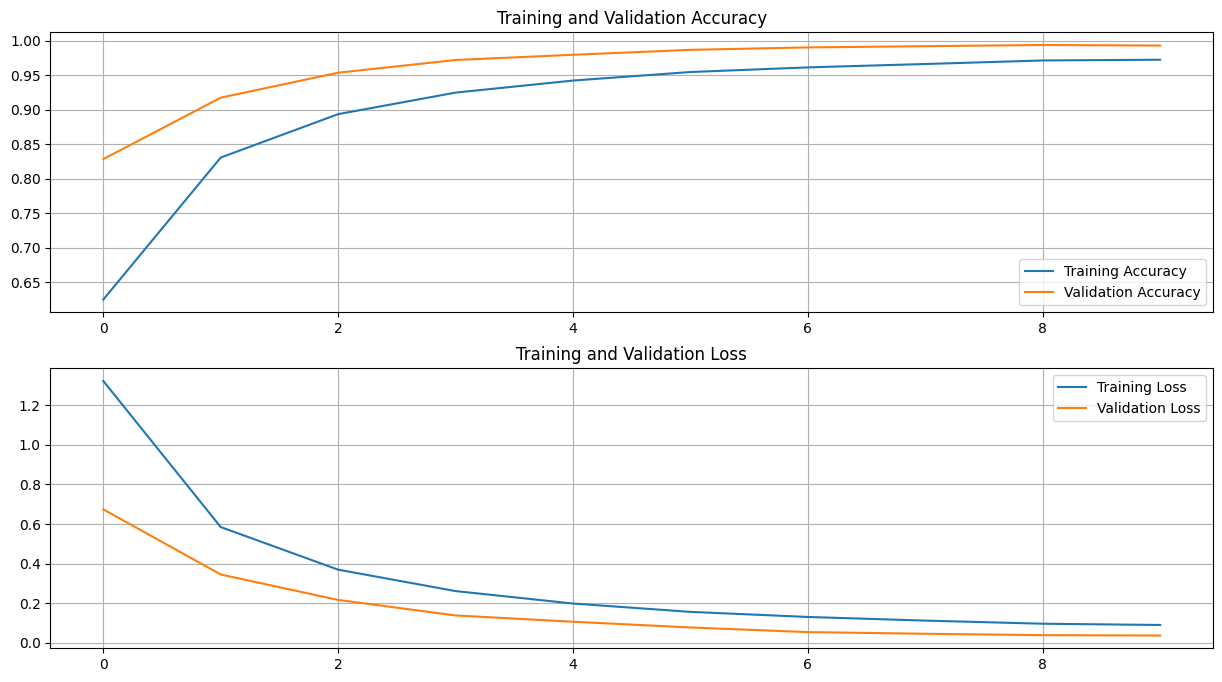

In [80]:
# verify training performance
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
plt.grid(True)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.grid(True)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [81]:
score = model1.evaluate(testx, testy, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.036942120641469955
Test accuracy: 0.9930585026741028


In [82]:
print(testx.shape)

(82835, 32, 32, 3)


In [93]:
diretorio = dirTeste + "/M/3001.jpg"
image=load_img(diretorio,target_size=(32,32))
image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [94]:
prediction=model1.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

1/1 [==============================] - 0s 12ms/step
Prediction is L.
